### Creating and Training a Model on Fashion MNIST Data

* Create the FashionMNIST dataset, apply transformations, and set up the DataLoader.
* Build a neural network model using layers, functions, and `Sequential`.
* Understand the loss function and optimizer.
* Implement the training loop:

  * In PyTorch, the model creation and training logic are loosely coupled.
  * The model focuses on transforming input tensors (batch-wise) according to the network structure and returning output tensors, which implicitly builds the computational graph.
  * The training loop uses the output tensors along with a loss function and optimizer to perform backpropagation and update the model’s weight parameters. This process is repeated for each batch of training data and iterated over the entire dataset for the number of epochs specified.


#### Creating the Fashion MNIST Dataset

* Download the FashionMNIST dataset from `torchvision.datasets`.
* Setting `train=True` creates the training dataset, while `train=False` creates the test dataset.
* The image data is in PIL format, so you need to convert it to a tensor using `torchvision.transforms.ToTensor()`.


In [1]:
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision.transforms import ToTensor  # Important class to convert images to tensors

# Download the FashionMNIST training dataset
train_data = datasets.FashionMNIST(root='data', train=True, download=True)  # , transform=ToTensor()

# Download the test dataset (used here for testing/validation purposes — though ideally should not be used for validation)
test_data = datasets.FashionMNIST(root='data', train=False, download=True)  # , transform=ToTensor()


100%|██████████| 26.4M/26.4M [00:03<00:00, 7.60MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 113kB/s]
100%|██████████| 4.42M/4.42M [00:02<00:00, 1.83MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 12.5MB/s]


In [2]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train

In [3]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test

**PIL: Python Imaging Library**

* Provides useful functions for image processing, such as opening images, cropping, rotating, applying filters, and saving.
* `PIL.Image.Image` is the image object type used by the Pillow (PIL) library.
  → In other words, it can be thought of as a **Python object representing an image file in memory**.


In [4]:
# Each Fashion MNIST data point consists of a tuple containing a PIL Image and its corresponding label/target
print(train_data[0])
print(type(train_data[0]))
print(type(train_data[0][0]))
print(len(train_data))


(<PIL.Image.Image image mode=L size=28x28 at 0x796067542E10>, 9)
<class 'tuple'>
<class 'PIL.Image.Image'>
60000


In [5]:
train_data[0][0]  # PIL Image can be visualized directly


In [6]:
print(type(train_data.data), train_data.data.shape)

<class 'torch.Tensor'> torch.Size([60000, 28, 28])


In [7]:
print(train_data.targets.shape) #label 

torch.Size([60000])


`train_data.data`:
This attribute directly accesses the raw image tensors inside the `datasets.FashionMNIST` class.

In other words, it contains the unprocessed, raw data before any transforms are applied, and PyTorch stores it internally as `torch.Tensor`.

`train_data[0][0]` → accessed externally via `__getitem__()` and converted to a `PIL.Image`.

`train_data.data` → internal storage, already stored as tensors for all images.


### Visualizing Fashion MNIST Images


Text(0.5, 1.0, '9')

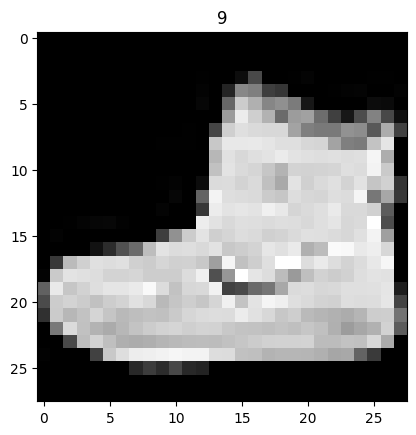

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

train_image = train_data[0][0]
train_label = train_data[0][1]

#visualize PIL Image
plt.imshow(train_image, cmap='gray') # Set the colormap to 'gray' to display the image in grayscale

plt.title(train_label)

In [9]:
train_images = [image for image, _ in train_data]
train_labels = [label for _, label in train_data]

In [10]:
type(train_images[0])

PIL.Image.Image

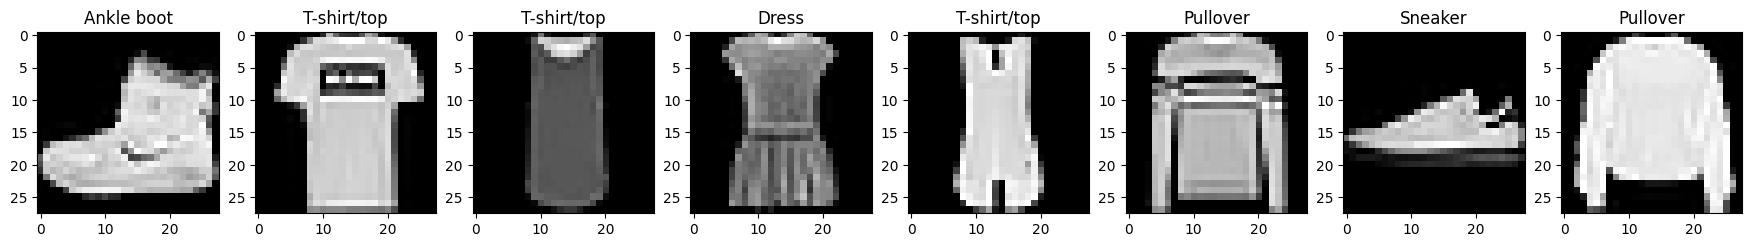

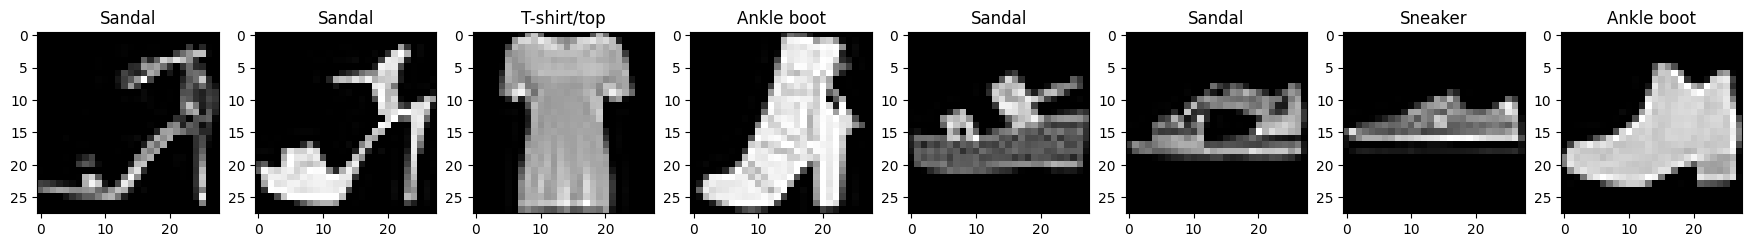

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def show_images(images, labels, ncols=8):
    figure, axs = plt.subplots(figsize=(22,6), nrows=1, ncols=ncols)
    for i in range(ncols):
        axs[i].imshow(images[i], cmap='gray')
        axs[i].set_title(class_names[labels[i]])

show_images(train_images[:8], train_labels[:8], ncols=8)
show_images(train_images[8:16], train_labels[8:16], ncols=8)

### Creating a DataLoader to Fetch the Dataset in Batches

* A `DataLoader` efficiently feeds a dataset to the model in batches.

Parameters:

* **dataset**: The dataset object to load.
* **batch\_size**: Number of samples to load per batch.
* **shuffle**: Whether to shuffle the data at the end of each epoch.
* **num\_workers**: Number of parallel worker processes for loading data.

  * CPU handles data preparation (e.g., opening images, applying transforms) while GPU performs computations.
  * If data is not prepared quickly enough, the GPU waits idly.
  * Loading data in parallel across multiple CPU processes significantly speeds up training.

- It is recommended that the DataLoader outputs data in tensor form.


In [12]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

# Create DataLoader 
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=4)
val_loader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False, num_workers=4)

In [13]:
# # The following error occurs because DataLoader cannot batch PIL images directly.
# # TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found <class 'PIL.Image.Image'>
# images, labels = next(iter(train_loader))
# print(images.shape, images.dtype, labels.shape, labels.dtype)


In [14]:
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

# Apply torchvision.transforms.ToTensor() during dataset download so DataLoader returns tensors
train_data = datasets.FashionMNIST(root='data', train=True, download=True, transform=ToTensor())
val_data = datasets.FashionMNIST(root='data', train=False, download=True, transform=ToTensor())
# ToTensor() converts images to tensors and normalizes pixel values to [0, 1]
# Each time a dataset item is accessed via indexing, ToTensor() is applied
print('train_data image, label type:', type(train_data[0][0]), type(train_data[0][1]))

BATCH_SIZE = 32
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=4)
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=False, num_workers=4)

images, labels = next(iter(train_loader))
print(images.shape, images.dtype, labels.shape, labels.dtype)


train_data image, label type: <class 'torch.Tensor'> <class 'int'>
torch.Size([32, 1, 28, 28]) torch.float32 torch.Size([32]) torch.int64


### Creating a Linear Model

* A Linear Model takes a 4-dimensional image batch tensor as input and outputs 10 classification logits.
* Since a Linear layer expects a 2D input (batch size × features), each individual 3D image (grayscale images are originally 2D, but represented as 3D with channel dimension) must be flattened into a 1D tensor using `nn.Flatten()`.
* Model construction can be done in several ways:

  * Declare all Linear layers and activation functions as separate `Layer` objects, then chain them in `forward()`.
  * Declare only weight-bearing layers (e.g., Linear) as `Layer` objects and use functional APIs for activation, pooling, etc., in `forward()`.
  * Use `nn.Sequential` to stack layers and functions in a single, ordered container.


In [15]:
import torch
import torch.nn as nn

# apply Flatten
flatten = nn.Flatten()
flatten_output = flatten(images) # start_dim = 1 , end_dim = -1
print(images.shape, flatten_output.shape)

torch.Size([32, 1, 28, 28]) torch.Size([32, 784])


In [16]:
class SimpleLinearModel_01(nn.Module):
    def __init__(self, input_size, num_classes=10):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_01 = nn.Linear(in_features=input_size*input_size, out_features=200 )
        self.act_01 = nn.ReLU()
        self.linear_02 = nn.Linear(in_features=200, out_features=100)
        self.act_02 = nn.ReLU()
        self.linear_03 = nn.Linear(in_features=100, out_features=num_classes)

    def forward(self, x):
        x = self.flatten(x)
        x = self.linear_01(x)
        x = self.act_01(x)
        x = self.linear_02(x)
        x = self.act_02(x)
        output = self.linear_03(x)
        return output

In [17]:
INPUT_SIZE = 28
NUM_CLASSES = 10 

model_01 = SimpleLinearModel_01(input_size=INPUT_SIZE, num_classes=NUM_CLASSES)
print(model_01)

SimpleLinearModel_01(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_01): Linear(in_features=784, out_features=200, bias=True)
  (act_01): ReLU()
  (linear_02): Linear(in_features=200, out_features=100, bias=True)
  (act_02): ReLU()
  (linear_03): Linear(in_features=100, out_features=10, bias=True)
)


In [18]:
#임의의 tensor를 입력
input_tensor = torch.randn(4, 1, 28, 28)
output = model_01(input_tensor)

print(output.shape)

torch.Size([4, 10])


In [19]:
BATCH_SIZE = 32

train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=4)
val_loader = DataLoader(val_data, batch_size = BATCH_SIZE, shuffle=False, num_workers=4)

images, labels = next(iter(train_loader))


print(images.shape)
output = model_01(images)
print(output.shape)
print(output[0])

torch.Size([32, 1, 28, 28])
torch.Size([32, 10])
tensor([ 0.0507,  0.0429, -0.0194,  0.0462,  0.0921, -0.0505, -0.0254, -0.0186,
         0.0820, -0.0631], grad_fn=<SelectBackward0>)


In [20]:
from torchinfo import summary

summary(model=model_01, input_size=(1,1,28,28),
        col_names=['input_size', 'output_size', 'num_params'],
        row_settings=['var_names', 'depth'],
       )

Layer (type (var_name):depth-idx)             Input Shape               Output Shape              Param #
SimpleLinearModel_01 (SimpleLinearModel_01)   [1, 1, 28, 28]            [1, 10]                   --
├─Flatten (flatten): 1-1                      [1, 1, 28, 28]            [1, 784]                  --
├─Linear (linear_01): 1-2                     [1, 784]                  [1, 200]                  157,000
├─ReLU (act_01): 1-3                          [1, 200]                  [1, 200]                  --
├─Linear (linear_02): 1-4                     [1, 200]                  [1, 100]                  20,100
├─ReLU (act_02): 1-5                          [1, 100]                  [1, 100]                  --
├─Linear (linear_03): 1-6                     [1, 100]                  [1, 10]                   1,010
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.18
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Par

### Creating a Model Using Linear Layers Only and Applying Activation with `F.relu()` Function


In [21]:
import torch.nn.functional as F

class SimpleLinearModel_02(nn.Module):
    def __init__(self, input_size, num_classes=10):
        super().__init__()
        # Use nn.Linear layers only. Linear layers internally have learnable parameters like weight and bias.
        # This approach makes the model more flexible and easier to construct.
        self.linear_01 = nn.Linear(input_size * input_size, 200)
        self.linear_02 = nn.Linear(200, 100)
        self.linear_03 = nn.Linear(100, num_classes)

    # Forward pass: input tensor → processed through layers → output tensor returned
    def forward(self, x):
        # Unlike nn.Flatten(), torch.flatten() defaults start_dim=0. Set start_dim=1 to preserve batch dimension.
        x = torch.flatten(x, start_dim=1, end_dim=-1)
        x = F.relu(self.linear_01(x))
        x = F.relu(self.linear_02(x))
        output = self.linear_03(x)

        # Alternatively, it could be written in a single line, but it's less readable:
        # x = torch.flatten(x, start_dim=1, end_dim=-1)
        # output = self.linear_03(F.relu(self.linear_02(F.relu(self.linear_01(x)))))

        # Return the final tensor after passing through all layers
        return output


In [22]:
INPUT_SIZE = 28
NUM_CLASSES = 10

print(images.shape)
model_02 = SimpleLinearModel_02(input_size=INPUT_SIZE, num_classes=NUM_CLASSES)

output = model_02(images)
print(output.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32, 10])


In [23]:
from torchinfo import summary

summary(model=model_02, input_size=(1, 1, 28, 28), 
        col_names=['input_size', 'output_size', 'num_params'],
        row_settings=['var_names', 'depth'],
        #verbose=2
       )

Layer (type (var_name):depth-idx)             Input Shape               Output Shape              Param #
SimpleLinearModel_02 (SimpleLinearModel_02)   [1, 1, 28, 28]            [1, 10]                   --
├─Linear (linear_01): 1-1                     [1, 784]                  [1, 200]                  157,000
├─Linear (linear_02): 1-2                     [1, 200]                  [1, 100]                  20,100
├─Linear (linear_03): 1-3                     [1, 100]                  [1, 10]                   1,010
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.18
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.71
Estimated Total Size (MB): 0.72

### Creating a Model Using `Sequential`

* `nn.Sequential` allows you to modularly chain layers or modules passed as arguments into a single sequential block.
* This approach eliminates the need to explicitly define the layer connections inside `forward()`, enabling efficient creation of repeated or ordered layer blocks.
* Documentation: [PyTorch nn.Sequential](https://docs.pytorch.org/docs/stable/generated/torch.nn.Sequential.html#torch.nn.Sequential)
* For more complex layer arrangements, consider using `nn.ModuleList`.


In [24]:
import torch.nn.functional as F

class SimpleLinearModel_03(nn.Module):
    def __init__(self, input_size, num_classes=10):
        super().__init__()
        self.linear_block_01 = nn.Sequential(nn.Linear(in_features=input_size*input_size, out_features=200),
                                              nn.ReLU(), 
                                              nn.Linear(200, 100),
                                              nn.ReLU(),
                                              nn.Linear(100, num_classes)
                                            )
    def forward(self, x):
        x = torch.flatten(x, start_dim=1, end_dim=-1)
        output = self.linear_block_01(x)
        return output

In [25]:
INPUT_SIZE = 28
NUM_CLASSES = 10 

model_03 = SimpleLinearModel_03(input_size=INPUT_SIZE, num_classes=NUM_CLASSES)
output = model_03(images)
print(output.shape)

torch.Size([32, 10])


In [26]:
summary(model=model_03, input_size=(1, 1, 28, 28), 
        col_names=['input_size', 'output_size', 'num_params'],
        row_settings=['var_names', 'depth'],
        #verbose=2
       )

Layer (type (var_name):depth-idx)             Input Shape               Output Shape              Param #
SimpleLinearModel_03 (SimpleLinearModel_03)   [1, 1, 28, 28]            [1, 10]                   --
├─Sequential (linear_block_01): 1-1           [1, 784]                  [1, 10]                   --
│    └─Linear (0): 2-1                        [1, 784]                  [1, 200]                  157,000
│    └─ReLU (1): 2-2                          [1, 200]                  [1, 200]                  --
│    └─Linear (2): 2-3                        [1, 200]                  [1, 100]                  20,100
│    └─ReLU (3): 2-4                          [1, 100]                  [1, 100]                  --
│    └─Linear (4): 2-5                        [1, 100]                  [1, 10]                   1,010
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.18
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Par

#### Declare a function to create a SimpleLinearModel

* Create and return the model using the create_simple_linear_model() function

In [27]:
INPUT_SIZE = 28
NUM_CLASSES = 10

def create_simple_linear_model(input_size, num_classes=10):
    model = SimpleLinearModel_02(input_size=input_size, num_classes=num_classes)
    return model

In [28]:
BATCH_SIZE = 32

from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

train_data = datasets.FashionMNIST(root='data',train= True, download=True, transform=ToTensor())
val_data = datasets.FashionMNIST(root='data',train= False, download=True, transform=ToTensor())

train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=4 )
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=False, num_workers=4)

images, labels = next(iter(train_loader))

print(images.shape)
print(labels)

torch.Size([32, 1, 28, 28])
tensor([1, 7, 4, 4, 3, 2, 1, 6, 4, 7, 2, 4, 4, 1, 1, 2, 0, 7, 1, 7, 4, 4, 6, 6,
        0, 4, 2, 2, 8, 5, 4, 6])


### Loss Function (Class)

* For prediction models in multiclass classification, the loss function used is **Cross Entropy Loss**. PyTorch provides this through the `CrossEntropyLoss` class.
* `CrossEntropyLoss` takes as input **logit predictions without softmax applied** and integer-type labels (class indices). You must **not** provide one-hot encoded labels.
* Since the class internally applies softmax to the input logits, the model outputs must be raw logits without softmax applied.
* For labels (targets), you should input the class index values (from 0 to C). If needed, the class internally applies one-hot encoding, so you must not use one-hot encoded labels as input.
* Therefore, the input arguments are: (1) model outputs without softmax applied, and (2) target labels without one-hot encoding.
* The `CrossEntropyLoss` class is essentially a combination of **LogSoftmax** and **NLLLoss**. `LogSoftmax` improves numerical stability when computing cross entropy by avoiding instability that can occur when applying softmax followed by log separately.
* The output of `CrossEntropyLoss` is a tensor containing the computed loss value. Calling the `backward()` method on this loss tensor performs backpropagation and computes the gradients. The gradients are stored in the `grad` attribute of the model parameters, but the parameters themselves are **not updated automatically**. The actual update is carried out by the **optimizer**.



In [29]:
model = create_simple_linear_model(input_size=28, num_classes=10)
# output is logit
output = model(images)
print(output)
print(output.shape)

tensor([[-0.0397, -0.0897,  0.0843,  0.1433,  0.0938, -0.0330, -0.0900, -0.0608,
         -0.0505, -0.0291],
        [-0.0486, -0.0218,  0.0644,  0.1265,  0.0538, -0.0402, -0.1010, -0.0595,
         -0.0431,  0.0023],
        [ 0.0108, -0.0274,  0.0312,  0.2554,  0.0165, -0.0268, -0.0698,  0.0245,
         -0.0078,  0.0273],
        [ 0.0196,  0.0019,  0.0266,  0.2268,  0.0019, -0.0140, -0.0759,  0.0232,
         -0.0205,  0.0575],
        [-0.0503, -0.0420,  0.0587,  0.2080,  0.0405, -0.0207, -0.0865, -0.0286,
         -0.0189, -0.0113],
        [ 0.0028, -0.0469,  0.0500,  0.1534,  0.0384, -0.0246, -0.1096, -0.0490,
         -0.0502,  0.0123],
        [-0.0612, -0.0640,  0.1078,  0.0948,  0.0634, -0.0198, -0.0941, -0.0934,
         -0.0681, -0.0066],
        [-0.0199, -0.0887,  0.0808,  0.0810,  0.0746, -0.0380, -0.0896, -0.0570,
         -0.0502, -0.0157],
        [-0.0306, -0.0847,  0.0866,  0.1063,  0.0659, -0.0309, -0.0814, -0.0668,
         -0.0499, -0.0197],
        [-0.0146, -

In [30]:
model = create_simple_linear_model(input_size=28, num_classes=10)
# Model output (logit values)
output = model(images)

#criterion = nn.CrossEntropyLoss()
# Create CrossEntropyLoss object
loss_fn = nn.CrossEntropyLoss()
# Pass model outputs as the first argument and labels as the second argument
loss = loss_fn(output, labels)
print(loss, loss.item())


tensor(2.2752, grad_fn=<NllLossBackward0>) 2.275200128555298


In [31]:
print("Before backward():")
for name, param in model.named_parameters():
    print(f"{name}.grad: {param.grad}")

Before backward():
linear_01.weight.grad: None
linear_01.bias.grad: None
linear_02.weight.grad: None
linear_02.bias.grad: None
linear_03.weight.grad: None
linear_03.bias.grad: None


before calling .backward(), only the forward pass is executed — no gradients are computed yet.

That’s why param.grad is still None right after computing the loss.

PyTorch does this to save memory and computation until you explicitly ask for gradients.

In [32]:
loss.backward()

In [33]:
print(loss)

tensor(2.2752, grad_fn=<NllLossBackward0>)


In [34]:
print("After backward():")
for name, param in model.named_parameters():
    print(f"{name}.grad: {param.grad}")

After backward():
linear_01.weight.grad: tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  3.6187e-04,
          1.8093e-04,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ..., -2.4004e-04,
         -1.7412e-04,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  3.0344e-04,
          1.2162e-04,  0.0000e+00],
        ...,
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  2.4172e-04,
          1.5355e-04,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ..., -2.3644e-05,
          1.2023e-04,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00]])
linear_01.bias.grad: tensor([ 2.4805e-04,  1.0653e-03,  5.3265e-03,  9.6255e-04, -5.5003e-03,
        -4.2995e-03,  7.4225e-04,  7.4289e-04,  9.2936e-05,  1.9171e-03,
         8.7435e-04,  1.3535e-03, -4.9459e-03, -3.1119e-03, -2.0364e-03,
        -8.6476e-04,  4.6851e-03, -6.2901e-04,  2.7562e-03,  5.0241e-03,
         1.780

### Creating an Optimizer

* PyTorch’s `torch.optim` provides various optimizer classes.
* When creating an optimizer, you pass the model’s parameters and a learning rate as arguments.
* The `zero_grad()` method resets (initializes) the gradient values of the trainable parameters.
* The `step()` method updates the trainable parameters.
* [https://pytorch.org/docs/stable/optim.html](https://pytorch.org/docs/stable/optim.html)


In [35]:
from torch.optim import SGD, Adagrad, RMSprop, Adam

sgd_optim = SGD(model.parameters(), lr=0.001, momentum=0.9)
ada_grad_optim = Adagrad(model.parameters(), lr=0.001, eps=1e-9) 
rmsprop_optim = RMSprop(model.parameters(), lr=0.001, alpha=0.99, eps=1e-9) 
adam_optim = Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999))

In [36]:
model = create_simple_linear_model(input_size=28, num_classes=10)
# output is logit
output = model(images) # feed forward 

loss_fn = nn.CrossEntropyLoss()
loss = loss_fn(output, labels) # calculate loss 

optimizer = Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999))

params = list(model.parameters())
print('### gradients in initial state:', params[0].grad)
# print('### params[0] in initial state:', params[0])

loss.backward() # back propagation 
print('### gradient after loss.backward():', params[0].grad)
# print('### params[0] after loss.backward():', params[0])

optimizer.step() # update w (W ← W - lr × grad)
# print("### params[0] after optimizer.step():", params[0])

optimizer.zero_grad() # clears the gradients so that they don't accumulate
print('### gradient after optimizer.zero_grad():', params[0].grad)

### gradients in initial state: None
### gradient after loss.backward(): tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  2.9558e-04,
          1.5074e-04,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  5.7755e-05,
         -4.0737e-05,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  1.9539e-05,
          3.1147e-05,  0.0000e+00],
        ...,
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  6.0065e-05,
          2.7214e-05,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00]])
### gradient after optimizer.zero_grad(): None


### Setting the Device

* In PyTorch, you must explicitly specify whether to use the GPU or CPU. If not specified, PyTorch defaults to using the CPU for model training and inference.
* To do this, PyTorch uses the `torch.device` object. You need to assign the device to both the model and the tensors that are passed into the model and loss function. (In some cases, such as when using `torchemetrics`, you also need to specify the device for the metrics, but by default, you should at least set the device for the model itself and the tensors fed into it.)


In [37]:
# The device of tensor is cpu by default 
images, labels = next(iter(train_loader))
print(type(images), images.device, type(labels), labels.device)

<class 'torch.Tensor'> cpu <class 'torch.Tensor'> cpu


In [38]:
import torch
# Before running the following codes, you need to set the accelerator to GPU 
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device, type(device))

images, labels = next(iter(train_loader))
print(type(images), images.device, type(labels), labels.device)

images = images.to(device)
labels = labels.to(device)
print(type(images), images.device, type(labels), labels.device)

cuda:0 <class 'torch.device'>
<class 'torch.Tensor'> cpu <class 'torch.Tensor'> cpu
<class 'torch.Tensor'> cuda:0 <class 'torch.Tensor'> cuda:0


### It is important that both the model and the input tensors are on the same device. If they are on different devices, an error will occur.


In [39]:
# Extract images and labels from the training data in batches of batch_size
images, labels = next(iter(train_loader))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = create_simple_linear_model(input_size=28, num_classes=10)
model = model.to(device)
# The model is on device cuda:0, but images are still on CPU.
print('image tensor device:', images.device) 
# The device of the model can be checked with the parameters, e.g., next(model.parameters()).device

# To avoid errors, images must also be moved to the same device as the model using to('cuda').
#images = images.to(device)
#print(images.device)

# The following code will cause an error because the model is on cuda, 
# but the input tensor (images) is still on CPU. 
# pred = model(images)


image tensor device: cpu



### Creating the Training Logic (Loop)

* In PyTorch, the creation of neural network models and the training logic are **loosely coupled**.
* The model takes a batch of input training data tensors, transforms them according to its structure, and returns the output tensors — with a focus on **building the computational graph**.
* The training logic uses the model’s output tensors together with a loss function and an optimizer to update the model’s weight parameters through backpropagation. This is repeated for each batch of training data, and the process is run for the number of epochs specified.
* Before training begins, the model must be set to training mode (`model.train()`). This is important because when using techniques such as **Batch Normalization** or **Dropout**, the model behaves differently in training mode compared to validation or inference mode.


In [40]:
# Extract images and labels from the training data in batches of BATCH_SIZE
BATCH_SIZE = 32
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=4)

images, labels = next(iter(train_loader))
# Check the shapes and data types of the batch tensors
images.shape, images.dtype, labels.shape, labels.dtype


(torch.Size([32, 1, 28, 28]), torch.float32, torch.Size([32]), torch.int64)

In [41]:
import torch
import torch.nn as nn
from torch.optim import Adam

loss_fn = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.001)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# It is recommended to move the model to the device before entering the training loop
model.to(device)

# Set the model to training mode
model.train()

# Perform training loop in mini-batches. The training dataset has 60,000 samples
for batch_idx, (images, labels) in enumerate(train_loader):
    # Move input data to the same device as the model
    images = images.to(device)
    labels = labels.to(device)

    # Pass the image tensor through the model to get the output tensor (logits)
    pred = model(images)
   
    # Compute loss. CrossEntropyLoss applies softmax internally, so do NOT apply softmax to the model's output
    loss = loss_fn(pred, labels)

    # Initialize optimizer gradients
    optimizer.zero_grad()
    
    # Compute gradients via backpropagation
    loss.backward()
    
    # Update model parameters using the optimizer
    optimizer.step()
    
    if batch_idx % 100 == 0:
        print(f'Performing {batch_idx+1}th gradient update, current loss: {loss.item()}')


Performing 1th gradient update, current loss: 2.3128795623779297
Performing 101th gradient update, current loss: 0.7146307826042175
Performing 201th gradient update, current loss: 0.540241539478302
Performing 301th gradient update, current loss: 0.6614893674850464
Performing 401th gradient update, current loss: 0.7271491885185242
Performing 501th gradient update, current loss: 0.4488963782787323
Performing 601th gradient update, current loss: 0.4240359365940094
Performing 701th gradient update, current loss: 0.35440120100975037
Performing 801th gradient update, current loss: 0.2861812114715576
Performing 901th gradient update, current loss: 0.4208143353462219
Performing 1001th gradient update, current loss: 0.2932419776916504
Performing 1101th gradient update, current loss: 0.36761555075645447
Performing 1201th gradient update, current loss: 0.7389582991600037
Performing 1301th gradient update, current loss: 0.40139853954315186
Performing 1401th gradient update, current loss: 0.3881636

### Making it as a function

In [42]:
# Train the model on the training dataset in mini-batches for 1 epoch
def train_step():
    # Perform training loop in mini-batches. The training dataset has 60,000 samples
    for batch_idx, (images, labels) in enumerate(train_loader):
        # Move input data to the same device as the model
        images = images.to(device)
        labels = labels.to(device)
        
        # Pass the image tensor through the model to get the output tensor (logits)
        pred = model(images)
        
        # Compute loss. CrossEntropyLoss applies softmax internally, so do NOT apply softmax to the model output
        loss = loss_fn(pred, labels)

        # Initialize optimizer gradients
        optimizer.zero_grad()
        
        # Compute gradients via backpropagation
        loss.backward()
        
        # Update model parameters using the optimizer
        optimizer.step()
        
        # Print loss every 100 batches
        if batch_idx % 100 == 0:
            print(f'Applying gradient for batch {batch_idx+1}, current loss: {loss.item()}')

train_step()


Applying gradient for batch 1, current loss: 0.32917433977127075
Applying gradient for batch 101, current loss: 0.33505311608314514
Applying gradient for batch 201, current loss: 0.1745051145553589
Applying gradient for batch 301, current loss: 0.2757560908794403
Applying gradient for batch 401, current loss: 0.2841458022594452
Applying gradient for batch 501, current loss: 0.30647942423820496
Applying gradient for batch 601, current loss: 0.5381497740745544
Applying gradient for batch 701, current loss: 0.361266553401947
Applying gradient for batch 801, current loss: 0.2536719739437103
Applying gradient for batch 901, current loss: 0.6475058794021606
Applying gradient for batch 1001, current loss: 0.2673327624797821
Applying gradient for batch 1101, current loss: 0.24537798762321472
Applying gradient for batch 1201, current loss: 0.3880641460418701
Applying gradient for batch 1301, current loss: 0.6502519845962524
Applying gradient for batch 1401, current loss: 0.16738982498645782
App

#### Repeat the training loop for multiple epochs

In [43]:

EPOCHS = 10

optimizer = Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

# Move the model to the specified device
model = model.to(device)

# Set the model to training mode
model.train()

for epoch in range(EPOCHS):
    print(f"######## Starting training epoch {epoch+1}")
    train_step()


######## Starting training epoch 1
Applying gradient for batch 1, current loss: 0.3970460891723633
Applying gradient for batch 101, current loss: 0.4268745183944702
Applying gradient for batch 201, current loss: 0.15417563915252686
Applying gradient for batch 301, current loss: 0.3786919414997101
Applying gradient for batch 401, current loss: 0.28827956318855286
Applying gradient for batch 501, current loss: 0.34847432374954224
Applying gradient for batch 601, current loss: 0.32767096161842346
Applying gradient for batch 701, current loss: 0.17305293679237366
Applying gradient for batch 801, current loss: 0.2164413034915924
Applying gradient for batch 901, current loss: 0.7466790676116943
Applying gradient for batch 1001, current loss: 0.41108080744743347
Applying gradient for batch 1101, current loss: 0.3551371991634369
Applying gradient for batch 1201, current loss: 0.41207751631736755
Applying gradient for batch 1301, current loss: 0.2977469265460968
Applying gradient for batch 1401

### Perform evaluation using validation data

* Evaluate the model on batch-wise validation data during or after the training loop to check the model’s loss and performance metrics.
* Compare performance metrics on training data and validation data to monitor the extent of overfitting.
* Set the model to evaluation mode (`model.eval()`) before starting evaluation. This ensures layers like Batch Normalization or Dropout behave differently than in training mode.
* Evaluation is based on the model’s output, so backpropagation or gradient tracking is not required. By default, PyTorch tracks gradients for tensors with `requires_grad=True` during the forward pass, so to improve evaluation speed, gradient tracking is disabled using the `with torch.no_grad()` context.


In [44]:
BATCH_SIZE = 32

# No need to shuffle validation data. Usually, batch size can be larger than in training for speed improvement.
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=False, num_workers=4)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# loss function for evaluation
loss_fn = nn.CrossEntropyLoss()

# move model to the specified device
model = model.to(device)

# set model to evaluation mode
model.eval()

# apply torch.no_grad() context to disable gradient tracking for all tensors
with torch.no_grad():
# iterate over validation data in mini-batches
    for batch_idx, (images, labels) in enumerate(val_loader):
        # move input tensors to the same device as the model
        images = images.to(device)
        labels = labels.to(device)

        # forward pass through the model
        pred = model(images)
    
        # compute loss for comparison with training loss; no backpropagation performed
        loss = loss_fn(pred, labels)

        # print every 100 batches
        if batch_idx % 100 == 0:
            print(f'Validation loss at batch {batch_idx}: {loss.item()}')


Validation loss at batch 0: 0.6612581014633179
Validation loss at batch 100: 0.5522692203521729
Validation loss at batch 200: 0.3506075441837311
Validation loss at batch 300: 0.27856364846229553


In [45]:
def val_step():
    with torch.no_grad():
    # iterate over validation data in mini-batches
        for batch_idx, (images, labels) in enumerate(val_loader):
            # move input tensors to the same device as the model
            images = images.to(device)
            labels = labels.to(device)

            # forward pass through the model
            pred = model(images)
    
            # compute loss for comparison with training loss; no backpropagation performed
            loss = loss_fn(pred, labels)

            # print every 100 batches
            if batch_idx % 100 == 0:
                print(f'Validation loss at batch {batch_idx}: {loss.item()}')

#### Training Loop with Validation Data Evaluation


In [46]:
EPOCHS = 10

optimizer = Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

model = model.to(device)

for epoch in range(EPOCHS):
    # set model to training mode
    model.train()
    print(f"######## Starting train epoch {epoch+1}")
    train_step()

    # set model to evaluation mode
    model.eval()
    print(f"######## Starting validation epoch {epoch+1}")
    val_step()

######## Starting train epoch 1
Applying gradient for batch 1, current loss: 0.10308381915092468
Applying gradient for batch 101, current loss: 0.0332147441804409
Applying gradient for batch 201, current loss: 0.23480479419231415
Applying gradient for batch 301, current loss: 0.29505935311317444
Applying gradient for batch 401, current loss: 0.16447153687477112
Applying gradient for batch 501, current loss: 0.20250576734542847
Applying gradient for batch 601, current loss: 0.11963443458080292
Applying gradient for batch 701, current loss: 0.23377621173858643
Applying gradient for batch 801, current loss: 0.3336952030658722
Applying gradient for batch 901, current loss: 0.20074661076068878
Applying gradient for batch 1001, current loss: 0.1644068956375122
Applying gradient for batch 1101, current loss: 0.3539550304412842
Applying gradient for batch 1201, current loss: 0.2739941477775574
Applying gradient for batch 1301, current loss: 0.09637360274791718
Applying gradient for batch 1401,

1️⃣ Training loss

The training loss per batch is generally decreasing.

Some batches even reach 0.018, which is extremely low.

→ This means the model is fitting the training data very well.

2️⃣ Validation loss

Validation loss is irregular and sometimes quite high.

Example: batch 0 → 0.598, batch 200 → 0.225, batch 300 → 0.387

On average, validation loss is higher than training loss.

→ The model is not generalizing as well to unseen data.

### Predicting Images with a Trained Model


In [47]:
BATCH_SIZE = 32

# Reuse the val_data for test
test_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=False)
images, labels = next(iter(test_loader))


In [48]:
# Here, `model` should be a trained model. The model's device is 'cuda:0'.
# Set the model to evaluation mode.
model.eval()

with torch.no_grad():
    # Move images and labels to the same device as the model.
    images = images.to(device)
    labels = labels.to(device)

    # Forward pass: get logits from the model
    pred_logit = model(images)
    # Apply softmax to get probabilities and get the predicted class index
    pred_class = F.softmax(pred_logit, dim=-1).argmax(-1)
    
print('model output shape:', pred_logit.shape)
print('predicted class:', pred_class, pred_class.shape)
print('targets:', labels, labels.shape)

# Optional debugging:
# print('pred_logit[0]:', pred_logit[0])
# print('after softmax:', F.softmax(pred_logit[0], -1))
# print('after tensor argmax:', F.softmax(pred_logit[0], dim=-1).argmax(-1))

# Count the number of correct predictions
num_correct = (pred_class == labels).sum().item()
# print(pred_class == targets)
print(f'Out of {images.size()[0]} samples, {num_correct} predictions are correct')


model output shape: torch.Size([32, 10])
predicted class: tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 2, 8, 0, 2, 5, 7, 5,
        1, 2, 6, 0, 9, 3, 8, 8], device='cuda:0') torch.Size([32])
targets: tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 9,
        1, 4, 6, 0, 9, 3, 8, 8], device='cuda:0') torch.Size([32])
Out of 32 samples, 28 predictions are correct


In [49]:
# Predict a single image
s_image = images[0] #.unsqueeze(0)
s_label = labels[0] #.unsqueeze(0)
print(s_image.shape, s_label.shape)

model.eval()

with torch.no_grad():
    s_image = s_image.to(device)
    s_label = s_label.to(device)

    pred_logit = model(s_image)
    pred_class = F.softmax(pred_logit, dim=-1).argmax(-1)

print(f'target class:{s_label}, predicted class: {pred_class}')

torch.Size([1, 28, 28]) torch.Size([])
target class:9, predicted class: tensor([9], device='cuda:0')


Text(0.5, 1.0, 'Ankle boot')

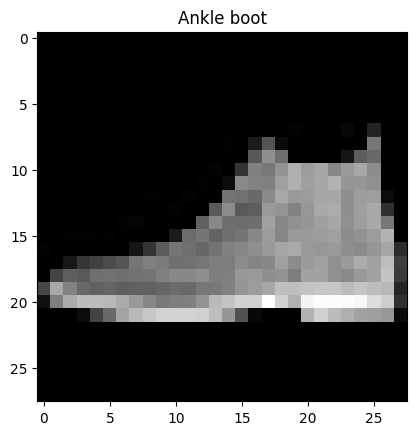

In [50]:
import matplotlib.pyplot as plt
from torchvision.transforms import ToPILImage

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#tensor to PIL
to_pil = ToPILImage()
pil_image = to_pil(images[0])

plt.imshow(pil_image, cmap='gray')
plt.title(class_names[pred_class.item()])
